# Preprocessing, Training, & Modeling

## Table of Contents<a id='Table_of_Contents'></a>
* [1 Processing, Training, & Modeling](#1_Processing_,_Training_,_Modeling)
    * [1.1 Table of Contents](#1.1_Table_of_Contents)
    * [1.2 Imports](#1.2_Imports)
    * [1.3 Load Data](#1.3_Load_Data)
    * [1.4 Feature Engineering](#1.4_Feature_Engineering)
    * [1.5 Model Building](#1.5_Model_Building) 
        * [1.5.1 Random Forest](#1.5.1_Random_Forest)
            * [1.5.1.1 Hyperparameter Tuning RF](#1.5.1.1_Hyperparameter_Tuning_RF)
        * [1.5.2 Gradient Boosting](#1.5.2_Gradient_Boosting)
            * [1.5.2.1 Hyperparameter Tuning GB](#1.5.2.1_Hyperparameter_Tuning_GB)
        * [1.5.3 XGBoost](#1.5.3_XGBoost)
            * [1.5.3.1 Hyperparameter Tuning XGB](#1.5.3.1_Hyperparamter_Tuning_XGB)

## Imports<a id='1.2_Imports'></a>

In [172]:
#call all import statements and their necessary pacakges
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Load Data<a id='1.3_Imports'></a>

In [173]:
movies = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/data/movies_cleaned.csv')
ratings = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/data/ratings_cleaned.csv')

The motivation behind combining these two datasets is to be able to understand which features play a key role in predicting the rating of a film to a certain degree. 

In [174]:
combined_df = pd.merge(movies,ratings, on ='id', how='left')

In [175]:
combined_df.info()           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183206 entries, 0 to 1183205
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   adult                  1183206 non-null  bool   
 1   belongs_to_collection  275952 non-null   object 
 2   budget                 1183206 non-null  float64
 3   genres                 1183206 non-null  object 
 4   homepage               281360 non-null   object 
 5   id                     1183206 non-null  int64  
 6   imdb_id                1183180 non-null  object 
 7   original_language      1183193 non-null  object 
 8   original_title         1183206 non-null  object 
 9   overview               1178266 non-null  object 
 10  popularity             1183206 non-null  float64
 11  poster_path            1181842 non-null  object 
 12  production_companies   1183206 non-null  object 
 13  production_countries   1183206 non-null  object 
 14  release_date      

In [176]:
combined_df.shape

(1183206, 30)

In [177]:
combined_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,day,month,num_genres,userId,rating
count,1.183206e+06,1.183206e+06,1.183206e+06,1.183206e+06,1.182867e+06,1.183206e+06,1.183206e+06,1.182404e+06,1.182404e+06,1.182404e+06,1.183206e+06,1.143571e+06,1.143571e+06
mean,1.912366e+07,1.079739e+04,7.854956e+00,7.237566e+07,1.080995e+02,6.584738e+00,6.413840e+02,1.987447e+03,1.518177e+01,6.932811e+00,2.409820e+00,1.347564e+04,7.062312e+00
std,3.731519e+07,3.423603e+04,6.648255e+00,1.727673e+08,2.598008e+01,1.125276e+00,1.201326e+03,2.156605e+01,9.149474e+00,3.533301e+00,1.057717e+00,7.803694e+03,2.120801e+00
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.874000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,5.090000e+02,2.686234e+00,0.000000e+00,9.400000e+01,6.100000e+00,2.500000e+01,1.975000e+03,7.000000e+00,4.000000e+00,2.000000e+00,6.672000e+03,6.000000e+00
50%,1.073000e+06,1.580000e+03,7.274948e+00,1.108462e+06,1.050000e+02,6.800000e+00,1.470000e+02,1.996000e+03,1.500000e+01,7.000000e+00,2.000000e+00,1.338700e+04,8.000000e+00
75%,2.200000e+07,3.396000e+03,1.126747e+01,6.867323e+07,1.200000e+02,7.300000e+00,6.300000e+02,2.004000e+03,2.300000e+01,1.000000e+01,3.000000e+00,2.028400e+04,8.000000e+00
max,3.800000e+08,4.691720e+05,5.474883e+02,2.787965e+09,1.256000e+03,1.000000e+01,1.407500e+04,2.020000e+03,3.100000e+01,1.200000e+01,8.000000e+00,2.704700e+04,1.000000e+01


In [178]:
combined_df['id'].value_counts()

318      9231
296      8764
593      8451
260      7747
480      7521
         ... 
38510       1
48747       1
42600       1
56935       1
40471       1
Name: id, Length: 45430, dtype: int64

In [179]:
combined_df.groupby(by='original_title')['rating'].count().sort_values(ascending=False).head(10)

original_title
The Million Dollar Hotel              9231
Terminator 3: Rise of the Machines    8764
Солярис                               8451
The 39 Steps                          7747
Monsoon Wedding                       7521
Once Were Warriors                    6853
Trois couleurs : Rouge                6639
License to Wed                        6056
La passion de Jeanne d'Arc            5783
48 Hrs.                               5774
Name: rating, dtype: int64

In [180]:
combined_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    907254
homepage                 901846
tagline                  371458
timestamp                 39635
userId                    39635
rating                    39635
overview                   4940
poster_path                1364
release_date                802
month                       802
year                        802
day                         802
runtime                     339
status                      150
imdb_id                      26
original_language            13
video                         0
num_genres                    0
budget                        0
genres                        0
id                            0
popularity                    0
original_title                0
vote_average                  0
production_companies          0
production_countries          0
vote_count                    0
revenue                       0
spoken_languages              0
adult                         0
dtype: int64

In [181]:
combined_df[combined_df['rating'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,day,month,num_genres,userId,rating,timestamp
45,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"['Romance', 'Comedy']",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995.0,22.0,12.0,2,NaN,NaN,NaN
46,False,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995.0,22.0,12.0,3,NaN,NaN,NaN
47,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,['Comedy'],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995.0,10.0,2.0,1,NaN,NaN,NaN
269,False,NaN,58000000.0,"['Comedy', 'Romance']",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,False,6.2,141.0,1995.0,15.0,12.0,2,NaN,NaN,NaN
270,False,NaN,0.0,"['Action', 'Adventure', 'Drama', 'Family']",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,False,5.4,45.0,1995.0,22.0,12.0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183200,False,NaN,0.0,"['Drama', 'Action', 'Romance']",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,False,5.7,26.0,1991.0,13.0,5.0,3,NaN,NaN,NaN
1183201,False,NaN,0.0,"['Drama', 'Family']",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,False,4.0,1.0,NaN,NaN,NaN,2,NaN,NaN,NaN
1183203,False,NaN,0.0,"['Action', 'Drama', 'Thriller']",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,False,3.8,6.0,2003.0,1.0,8.0,3,NaN,NaN,NaN
1183204,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,False,0.0,0.0,1917.0,21.0,10.0,0,NaN,NaN,NaN


In [182]:
combined_df['status'].value_counts()

Released           1180955
Rumored               1876
Post Production        146
In Production           62
Planned                 15
Canceled                 2
Name: status, dtype: int64

In [183]:
combined_df = combined_df.dropna(subset=['year','month','day','rating'])

In [184]:
model_df = combined_df.drop(['tagline', 'overview', 'poster_path', 
                               'imdb_id', 'id', 'userId', 'video', 'release_date', 'status','timestamp'], axis = 1)

In [185]:
#fill_cols = ['belongs_to_collection', 'homepage', 'tagline', 'overview', 'poster_path', 
#             'original_language', 'status', 'imdb_id', 'release_date']
#for col in fill_cols:
#    combined_df[col].fillna(' ', inplace=True)

In [186]:
model_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    870552
homepage                 868936
runtime                      91
original_language             3
rating                        0
production_companies          0
budget                        0
genres                        0
original_title                0
popularity                    0
production_countries          0
num_genres                    0
revenue                       0
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
adult                         0
dtype: int64

In [187]:
#combined_df['runtime'].fillna(combined_df['runtime'].mean(), inplace=True)

In [188]:
#cols_fill = ['year', 'month', 'day']
#for col in cols_fill:
#    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

In [189]:
combined_df['rating'].value_counts().head(10)

8.0     313827
6.0     258086
10.0    177612
7.0     115695
4.0      81467
9.0      80798
5.0      47032
2.0      39270
3.0      14859
1.0      14204
Name: rating, dtype: int64

In [190]:
combined_df['id'].nunique()

5792

In [191]:
combined_df['userId'].nunique()

26543

In [192]:
#combined_df['userId'] = combined_df['userId'].astype(int)

In [193]:
combined_df['userId'].value_counts().head(10)

8659.0     3022
24025.0    1346
3437.0     1092
25808.0    1059
5829.0     1059
5620.0     1024
13839.0    1003
19580.0     998
6513.0      974
17211.0     973
Name: userId, dtype: int64

In [194]:
combined_df.groupby('original_title')['rating'].mean().reset_index(name= 'rating')

,original_title,rating
0,!Women Art Revolution,6.119565
1,$5 a Day,4.888889
2,'Gator Bait,7.047619
3,'R Xmas,6.600000
4,'Twas the Night Before Christmas,7.512195
...,...,...
5709,헬로우 고스트,6.588235
5710,형사 Duelist,7.000000
5711,활,7.714894
5712,회사원,7.000000


In [195]:
ratings_df = pd.DataFrame(combined_df.groupby('original_title')['rating'].mean())  
  
ratings_df['num_ratings'] = pd.DataFrame(combined_df.groupby('original_title')['rating'].count()) 
  
ratings_df.sort_values(by='num_ratings', ascending=False).head(10) 

,rating,num_ratings
original_title,,
The Million Dollar Hotel,8.833604,9231
Terminator 3: Rise of the Machines,8.370379,8764
Солярис,8.298545,8451
The 39 Steps,8.243449,7747
Monsoon Wedding,7.305544,7521
Once Were Warriors,8.508099,6853
Trois couleurs : Rouge,8.023949,6639
License to Wed,8.448151,6056
La passion de Jeanne d'Arc,6.774511,5783


In [196]:
return_df = pd.DataFrame(combined_df.groupby('original_title')[['budget', 'revenue']].mean())
return_df['profit'] = return_df['revenue'] - return_df['budget']
return_df.sort_values(by='profit', ascending=False)[0:9]

,budget,revenue,profit
original_title,,,
Titanic,1.469177e+08,1.321298e+09,1.174380e+09
Avengers: Age of Ultron,2.800000e+08,1.405404e+09,1.125404e+09
The Lord of the Rings: The Return of the King,9.400000e+07,1.118889e+09,1.024889e+09
Pirates of the Caribbean: Dead Man's Chest,2.000000e+08,1.065660e+09,8.656598e+08
Jurassic Park,6.300000e+07,9.201000e+08,8.571000e+08
Harry Potter and the Philosopher's Stone,1.250000e+08,9.764756e+08,8.514756e+08
The Lord of the Rings: The Two Towers,7.900000e+07,9.262874e+08,8.472874e+08
Finding Nemo,9.400000e+07,9.403355e+08,8.463355e+08
The Dark Knight,1.850000e+08,1.004558e+09,8.195584e+08


C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


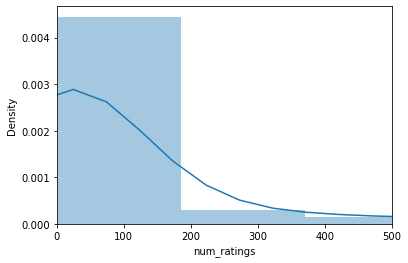

In [197]:
_ = sns.distplot(ratings_df['num_ratings'])
_ = plt.xlim([0,500])
plt.show()

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


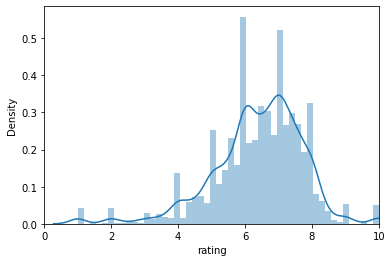

In [198]:
_ = sns.distplot(ratings_df['rating'])
_ = plt.xlim([0,10])
plt.show()

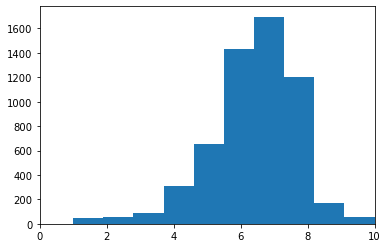

In [199]:
_ = plt.hist(ratings_df['rating'], bins=10)
_ = plt.xlim([0,10])
plt.show()

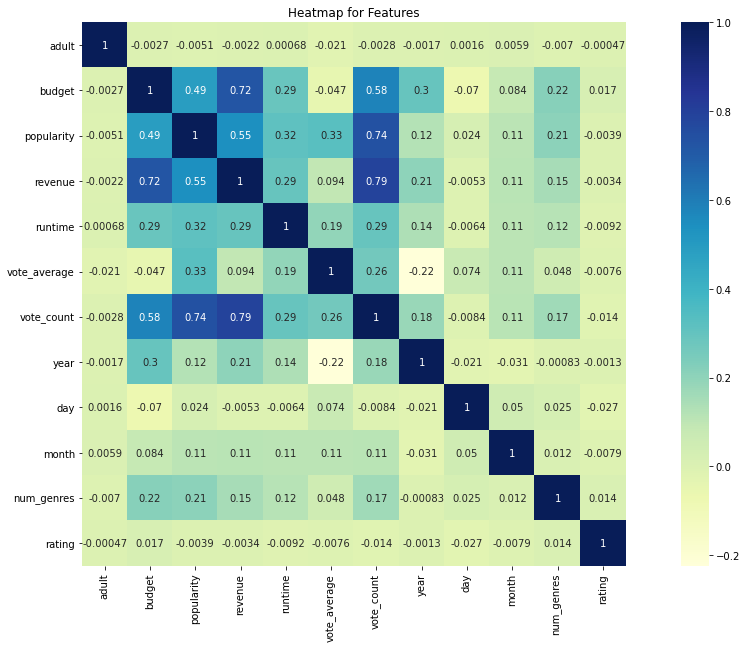

In [200]:
_ = plt.figure(figsize=(20,10))
_ = sns.heatmap(model_df.corr(), square=True, cmap="YlGnBu", annot=True)
_ = plt.title("Heatmap for Features")
plt.show()

In [201]:
model_df.dtypes

adult                       bool
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
original_language         object
original_title            object
popularity               float64
production_companies      object
production_countries      object
revenue                  float64
runtime                  float64
spoken_languages          object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                    float64
num_genres                 int64
rating                   float64
dtype: object

In [202]:
model_df['original_language'].fillna('', inplace=True)

In [203]:
#model_df = model_df.dropna(['rating','month', 'day', 'year'])

In [204]:
model_df.isnull().sum()

adult                         0
belongs_to_collection    870552
budget                        0
genres                        0
homepage                 868936
original_language             0
original_title                0
popularity                    0
production_companies          0
production_countries          0
revenue                       0
runtime                      91
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
num_genres                    0
rating                        0
dtype: int64

In [205]:
zeros = pd.concat([(model_df == 0).astype(int).sum(axis=0), 100 * (model_df == 0).astype(int).mean(axis=0)], axis=1)
zeros.columns=['count', '% of 0s']
zeros.sort_values(by='% of 0s', ascending = False)

,count,% of 0s
adult,1142820,99.997375
revenue,528494,46.243514
budget,504085,44.107713
vote_average,6639,0.580916
vote_count,5103,0.446515
num_genres,4788,0.418953
runtime,2087,0.182614
popularity,1,0.000088
production_companies,0,0.000000
production_countries,0,0.000000


In [206]:
def total_nums(df, genre):    
    pattern = [genre] 
    jk= '|'.join(pattern)
    return df.genres.str.contains(jk).sum()

In [207]:
def contains_genre(df, genre):
    pattern = [genre] 
    jk= '|'.join(pattern)
    df['is_' + str(genre)] = df.genres.str.contains(jk).astype(int)
    return df['is_' + str(genre)]

In [208]:
model_df.genres.value_counts().sort_values(ascending=False).head(10)

['Drama']                         126664
['Comedy']                         50701
['Drama', 'Romance']               41699
['Comedy', 'Drama', 'Romance']     38080
['Comedy', 'Drama']                32820
['Drama', 'Thriller']              21889
['Drama', 'History']               18696
['Comedy', 'Romance']              18223
['Crime', 'Drama']                 17331
['Horror']                         16171
Name: genres, dtype: int64

In [209]:
cols = ['Science Fiction', 'Western', 'Drama', 'Romance', 'Comedy', 'Thriller', 'Horror', 
        'Crime', 'Family', 'Action', 'Adventure', 'Fantasy']
for col in cols:
    print(col + ': ', total_nums(model_df,col))

Science Fiction:  138751
Western:  26287
Drama:  659031
Romance:  210300
Comedy:  324476
Thriller:  290268
Horror:  92486
Crime:  196502
Family:  58157
Action:  226776
Adventure:  159896
Fantasy:  85903


In [210]:
model_df['production_companies']

0          ['Pixar Animation Studios']
1          ['Pixar Animation Studios']
2          ['Pixar Animation Studios']
3          ['Pixar Animation Studios']
4          ['Pixar Animation Studios']
                      ...             
1183187          ['Star Film Company']
1183188          ['Star Film Company']
1183189          ['Star Film Company']
1183190          ['Star Film Company']
1183202                ['Sine Olivia']
Name: production_companies, Length: 1142850, dtype: object

## Feature Engineering<a id='1.4_Feature_Engineering'></a>

In [211]:
def feat_eng(df):
    
    #df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda b: 0 if b == np.nan else 1)
    #df['homepage'] = df['homepage'].apply(lambda b: 0 if b == np.nan else 1)
    genres = ['Drama', 'Comedy', 'Thriller']
    for genre in genres:
        df['is_' + str(genre)] = contains_genre(df, genre)
    
    df['original_language'] = df['original_language'].apply(lambda l: 1 if l == 'en' else 0)
    
    #df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    #df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Summer'] = df['month'].apply(lambda x: 1 if x in [5.0,6.0,7.0,8.0,9.0] else 0)
    
    #df['spoken_languages'] = df['spoken_languages'].apply(lambda s: 1 if s == 'English' else 0)
    df['runtime'] = df['runtime'].fillna(combined_df['runtime'].mean())
    df = df.drop(['original_title', 'adult','genres', 'homepage', 'belongs_to_collection', 
                  'production_companies', 'production_countries','spoken_languages'], axis=1)
    return df

In [212]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + "_" + label] = np.where(small_df[variable] == label, 1,0) 

In [213]:
type(model_df)

pandas.core.frame.DataFrame

In [214]:
print("shape of the dataset: ", model_df.shape)

shape of the dataset:  (1142850, 20)


## Model Building<a id='1.5_Model_Building'></a>

In [215]:
model_df = model_df[(model_df.revenue >0) & (model_df.budget >0) & (model_df.vote_count > 0) & (model_df.runtime >0)]

In [216]:
small_df = model_df.sample(frac = 0.01, axis=0)

In [217]:
small_df.shape

(5421, 20)

In [218]:
type(small_df)

pandas.core.frame.DataFrame

In [219]:
def change(col):
    print(col)
    if not col:
        return "missing"
    return "_".join(col)
#if-else

In [220]:
#small_df['production_companies'] = small_df['production_companies'].apply(change)

In [221]:
# one hot encode these two columns for better results
pd.get_dummies(data=small_df, columns = ['production_companies', 'production_countries'],dtype=float)

,adult,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,revenue,runtime,...,"production_countries_['United States of America', 'Hong Kong', 'United Kingdom']","production_countries_['United States of America', 'India', 'France']","production_countries_['United States of America', 'Italy', 'Spain', 'Germany']","production_countries_['United States of America', 'Morocco']","production_countries_['United States of America', 'Spain']","production_countries_['United States of America', 'United Kingdom', 'Romania', 'Italy']","production_countries_['United States of America', 'United Kingdom']",production_countries_['United States of America'],"production_countries_['Uruguay', 'United States of America', 'Germany', 'Paraguay']",production_countries_[]
798284,False,NaN,50000000.0,"['Drama', 'Thriller']",http://syrianamovie.warnerbros.com/,en,Syriana,5.768575,94000000.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
411777,False,"{'id': 1960, 'name': 'Evil Dead Collection', '...",350000.0,['Horror'],NaN,en,The Evil Dead,10.421679,29400000.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
181835,False,NaN,900000.0,['Drama'],NaN,fr,Le Mépris,7.543337,528428.0,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34708,False,NaN,17000000.0,"['Comedy', 'Drama', 'Romance']",NaN,en,While You Were Sleeping,15.783615,182057016.0,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76323,False,NaN,1288000.0,"['Drama', 'Mystery']",NaN,en,Rebecca,8.590813,6000000.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43543,False,"{'id': 412680, 'name': 'Hard Target Collection...",18000000.0,"['Action', 'Adventure', 'Crime', 'Thriller']",NaN,en,Hard Target,7.834351,74189677.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80304,False,NaN,1020000.0,"['Drama', 'Mystery']",NaN,en,Laura,9.884516,2000000.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77596,False,NaN,1288000.0,"['Drama', 'Mystery']",NaN,en,Rebecca,8.590813,6000000.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
558782,False,NaN,8000000.0,"['Drama', 'Family']",http://www.whaleriderthemovie.com/,en,Whale Rider,11.040186,41400000.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
small_df.production_companies.value_counts().sort_values(ascending=False).head(20)

['Paramount Pictures']                                                                                                                                                          170
['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']     93
['TriStar Pictures']                                                                                                                                                             85
['Universal Pictures']                                                                                                                                                           84
['United Artists']                                                                                                                                                               59
['Columbia Pictures', 'Amblin Entertainment', 'Columbia Pictures Corporation', 'Parkes+MacDonald Ima

In [223]:
small_df.production_countries.value_counts().sort_values(ascending=False)

['United States of America']                                            3576
['United Kingdom', 'United States of America']                           329
['Germany', 'United States of America']                                  126
['United Kingdom']                                                       115
['Germany', 'United Kingdom', 'United States of America']                101
                                                                        ... 
['United States of America', 'Germany', 'Canada']                          1
['South Africa']                                                           1
['Finland']                                                                1
['Netherlands', 'United States of America']                                1
['Ireland', 'United States of America', 'Germany', 'United Kingdom']       1
Name: production_countries, Length: 112, dtype: int64

In [224]:
# encode the top 10 most frequent
top_10_comp = [x for x in small_df.production_companies.value_counts().sort_values(ascending=False).head(10).index]
top_10_count = [x for x in small_df.production_countries.value_counts().sort_values(ascending=False).head(10).index]

In [225]:
top_10_comp

["['Paramount Pictures']",
 "['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']",
 "['TriStar Pictures']",
 "['Universal Pictures']",
 "['United Artists']",
 "['Columbia Pictures', 'Amblin Entertainment', 'Columbia Pictures Corporation', 'Parkes+MacDonald Image Nation']",
 "['Village Roadshow Pictures', 'Robert Simonds Productions', 'Warner Bros.', 'Phoenix Pictures', 'Underground', 'Proposal Productions']",
 "['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']",
 "['United Artists', 'Star Partners II Ltd.']",
 "['TriStar Pictures', 'Carolco Pictures']"]

In [226]:
top_10_count

["['United States of America']",
 "['United Kingdom', 'United States of America']",
 "['Germany', 'United States of America']",
 "['United Kingdom']",
 "['Germany', 'United Kingdom', 'United States of America']",
 "['Australia', 'United States of America']",
 "['France', 'United States of America']",
 "['Germany']",
 "['Japan', 'United States of America']",
 "['Canada', 'France', 'Japan', 'United States of America']"]

In [227]:
one_hot_top_x(small_df, 'production_companies', top_10_comp)

In [228]:
one_hot_top_x(small_df, 'production_countries', top_10_count)

In [229]:
small_df.shape

(5421, 40)

In [230]:
len(small_df.production_companies)

5421

In [231]:
X,y=small_df.drop(['rating'], axis=1), small_df['rating']

In [232]:
X = feat_eng(X)

In [233]:
type(X)

pandas.core.frame.DataFrame

In [234]:
X.shape

(5421, 35)

In [235]:
X.head()

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,year,day,month,...,"production_countries_['Germany', 'United Kingdom', 'United States of America']","production_countries_['Australia', 'United States of America']","production_countries_['France', 'United States of America']",production_countries_['Germany'],"production_countries_['Japan', 'United States of America']","production_countries_['Canada', 'France', 'Japan', 'United States of America']",is_Drama,is_Comedy,is_Thriller,is_Summer
798284,50000000.0,1,5.768575,94000000.0,128.0,6.3,455.0,2005.0,23.0,11.0,...,0,0,0,0,0,0,1,0,1,0
411777,350000.0,1,10.421679,29400000.0,85.0,7.3,913.0,1981.0,15.0,10.0,...,0,0,0,0,0,0,0,0,0,0
181835,900000.0,0,7.543337,528428.0,103.0,7.5,138.0,1963.0,21.0,10.0,...,0,0,0,0,0,0,1,0,0,0
34708,17000000.0,1,15.783615,182057016.0,103.0,6.5,340.0,1995.0,21.0,4.0,...,0,0,0,0,0,0,1,1,0,0
76323,1288000.0,1,8.590813,6000000.0,130.0,7.7,346.0,1940.0,12.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [236]:
X.columns

Index(['budget', 'original_language', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'year', 'day', 'month', 'num_genres',
       'production_companies_['Paramount Pictures']',
       'production_companies_['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']',
       'production_companies_['TriStar Pictures']',
       'production_companies_['Universal Pictures']',
       'production_companies_['United Artists']',
       'production_companies_['Columbia Pictures', 'Amblin Entertainment', 'Columbia Pictures Corporation', 'Parkes+MacDonald Image Nation']',
       'production_companies_['Village Roadshow Pictures', 'Robert Simonds Productions', 'Warner Bros.', 'Phoenix Pictures', 'Underground', 'Proposal Productions']',
       'production_companies_['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']',
       'production_companie

In [237]:
#X.production_companies.value_counts().sort_values(ascending = False) 

In [238]:
X.original_language.value_counts()

1    5068
0     353
Name: original_language, dtype: int64

### Random Forest<a id='1.5.1_Random_Forest'></a>

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 241)

In [68]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state = 241)
rf_model.fit(X_train,y_train)

print("R^2 Training Score: {:.3f}".format(rf_model.score(X_train, y_train)))
print('score on test set: {:.3f}'.format(rf_model.score(X_test, y_test)))

for name, importance in zip(X_train.columns, rf_model.feature_importances_):
    print(name, "=", importance)

R^2 Training Score: 0.317
score on test set: 0.062
budget = 0.09117388196826935
original_language = 0.0058332620730295074
popularity = 0.11560377685806765
revenue = 0.11107043840317615
runtime = 0.1002343392911539
vote_average = 0.07549808433423691
vote_count = 0.10200326763890287
year = 0.09537946075988811
day = 0.08428576000274537
month = 0.04933702163459317
num_genres = 0.03651529996139018
production_companies_['Paramount Pictures'] = 0.012509505553658382
production_companies_['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions'] = 0.006307329801572763
production_companies_['TriStar Pictures'] = 0.013397152888329244
production_companies_['Universal Pictures'] = 0.0012358256065501893
production_companies_['Paramount Pictures', 'The Coppola Company', 'The Directors Company'] = 0.00021310155706292047
production_companies_['United Artists', 'Star Partners II Ltd.'] = 4.2

In [69]:
np.unique(y_test, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 19,  63,  16,  99,  47, 309, 119, 381,  69, 234], dtype=int64))

In [70]:
y_pred = rf_model.predict(X_test)

In [71]:
print(y_pred[:10])

[6.42114305 5.94725703 8.67646504 5.73657548 5.32514578 8.69579639
 8.09206786 6.32014496 7.51487593 6.68093194]


In [72]:
print(X_train.shape, X_test.shape)

(4065, 35) (1356, 35)


In [73]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

evc_rf = explained_variance_score(y_test, y_pred)
print("The explained variance score of this model is: ", evc_rf)

mae_rf = mean_absolute_error(y_test, y_pred)
print("The mean absolute error of this model is: ", mae_rf)

mse_rf = mean_squared_error(y_test, y_pred)
print("The mean squared error of this model is: ", mse_rf)

msle_rf = mean_squared_log_error(y_test, y_pred)
print("The mean squared log error of this model is: ",msle_rf)

med_rf = median_absolute_error(y_test, y_pred)
print("the median absolute error of this model is: ", med_rf)

r2_rf = r2_score(y_test, y_pred, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_rf)

The explained variance score of this model is:  0.0626910306767503
The mean absolute error of this model is:  1.6726428979854182
The mean squared error of this model is:  4.609120281339649
The mean squared log error of this model is:  0.11631323429329714
the median absolute error of this model is:  1.380929744795834
The r2 score of this model is:  0.062329847693978646


In [74]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for RF: %f' % (rmse_rf))

RMSE for RF: 2.146886


In [75]:
scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE: ", final_avg_rmse)

Final RMSE:  2.04055450982102


#### Hyperparamter Tuning RF<a id='1.5.1.1_Hyperparameter_Tuning_RF'></a>

In [76]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop=500,num=5)]
max_depth = [int(x) for x in np.linspace(start = 1, stop= 20, num=5)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap =[True]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(rf_model,random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=241),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [1, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 162, 275, 387,
                                                         500]},
                   random_state=241, verbose=1)

In [77]:
ypred_rf = rf_random.predict(X_test)
print(ypred_rf[:10])

[6.55733273 6.02230317 8.2250544  5.78440433 5.46553179 8.70618404
 7.98088991 7.08652847 7.36011877 6.68425131]


In [78]:
print(rf_random.best_params_)

{'n_estimators': 387, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15, 'bootstrap': True}


In [79]:
print("lowest RMSE found: ", np.sqrt(np.abs(rf_random.best_score_)))

lowest RMSE found:  0.31778770984255483


In [80]:
evc_rf_t = explained_variance_score(y_test, ypred_rf)
print("The explained variance score of this model is: ", evc_rf_t)

mae_rf_t = mean_absolute_error(y_test, ypred_rf)
print("The mean absolute error of this model is: ", mae_rf_t)

mse_rf_t = mean_squared_error(y_test, ypred_rf)
print("The mean squared error of this model is: ", mse_rf_t)

msle_rf_t = mean_squared_log_error(y_test, ypred_rf)
print("The mean squared log error of this model is: ",msle_rf_t)

med_rf_t = median_absolute_error(y_test, ypred_rf)
print("the median absolute error of this model is: ", med_rf_t)

r2_rf_t = r2_score(y_test, ypred_rf, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_rf_t)

The explained variance score of this model is:  0.08424148663421382
The mean absolute error of this model is:  1.6669561969265323
The mean squared error of this model is:  4.503083771797108
The mean squared log error of this model is:  0.11529351921971674
the median absolute error of this model is:  1.3205523280854101
The r2 score of this model is:  0.08390170175369838


In [83]:
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, ypred_rf))
print('RMSE for tuned RF: %f' % (rmse_rf_tuned))

RMSE for tuned RF: 2.122047


In [84]:
true_val = pd.DataFrame(data = {'prediction': ypred_rf, 'actual': y_test})

In [85]:
error = ypred_rf - y_test

In [86]:
error.head()

265526   -1.442667
799840    0.022303
439869    0.225054
407832   -4.215596
551304    3.465532
Name: rating, dtype: float64

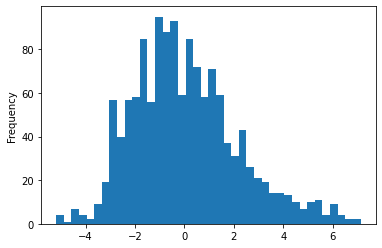

In [87]:
error.plot(kind='hist',bins=40)

### Gradient Boosting<a id='1.5.2_Gradient_Boosting'></a>

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=241)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)


for name, importance in zip(X_train.columns, gbr.feature_importances_):
    print(name, "=", importance)

budget = 0.059534310762710665
original_language = 0.000571101954595266
popularity = 0.14634835212943112
revenue = 0.14292337127492025
runtime = 0.0649829134994863
vote_average = 0.0668998717558137
vote_count = 0.0981742236029774
year = 0.10887137296183097
day = 0.09298315746286873
month = 0.018844277938356566
num_genres = 0.02659845112647418
production_companies_['Paramount Pictures'] = 0.014574314379083613
production_companies_['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions'] = 0.01503925370540189
production_companies_['TriStar Pictures'] = 0.031686624187829575
production_companies_['Universal Pictures'] = 0.003797710295416866
production_companies_['Paramount Pictures', 'The Coppola Company', 'The Directors Company'] = 0.0
production_companies_['United Artists', 'Star Partners II Ltd.'] = 0.0
production_companies_['Universal Pictures', 'Amblin Entertainment', 'U-D

In [89]:
ypred_gbr = gbr.predict(X_test)

In [90]:
evc_gbr= explained_variance_score(y_test, ypred_gbr)
print("The explained variance score of this model is: ", evc_gbr)

mae_gbr = mean_absolute_error(y_test, ypred_gbr)
print("The mean absolute error of this model is: ", mae_gbr)

mse_gbr = mean_squared_error(y_test, ypred_gbr)
print("The mean squared error of this model is: ", mse_gbr)

msle_gbr = mean_squared_log_error(y_test, ypred_gbr)
print("The mean squared log error of this model is: ",msle_gbr)

med_gbr = median_absolute_error(y_test, ypred_gbr)
print("the median absolute error of this model is: ", med_gbr)

r2_gbr = r2_score(y_test, ypred_gbr, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_gbr)

The explained variance score of this model is:  0.06656230891243675
The mean absolute error of this model is:  1.7082280451922314
The mean squared error of this model is:  4.588548426082603
The mean squared log error of this model is:  0.11789524398040026
the median absolute error of this model is:  1.2485437272786686
The r2 score of this model is:  0.06651494451824391


In [91]:
scores_gbr = cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_gbr = np.mean(np.sqrt(np.abs(scores_gbr)))
print("Final RMSE: ", final_avg_rmse_gbr)

Final RMSE:  2.051139987469864


In [92]:
rmse_gb = np.sqrt(mean_squared_error(y_test, ypred_gbr))
print('RMSE for GB: %f' % (rmse_gb))

RMSE for GB: 2.142090


#### Hyperparamter Tuning GB<a id='1.5.2.1_Hyperparameter_Tuning_GB'></a>

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV

#params = {'learning_rate': [0.01,0.05,0.10,0.20],
#          'subsample'    : [0.9, 0.5, 0.2, 0.1],
#          'n_estimators' : [100,500,1000, 1500],
#         'max_depth'    : [6,8,10,12]}


n_estimators = [int(x) for x in np.linspace(start = 100, stop=700,num=5)]
max_depth = [int(x) for x in np.linspace(start = 6, stop= 20, num=5)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap =[True,False]

random_grid = {'learning_rate': [0.001,0.01,0.10,0.20],
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gcv_random = RandomizedSearchCV(GradientBoostingRegressor(),random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
gcv_random.fit(X_train,y_train)

#gcv = GridSearchCV(GradientBoostingRegressor(),param_grid= params, scoring = 'neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)
#gcv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 32.6min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [6, 9, 13, 16, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 250, 400, 550,
                                                         700]},
                   random_state=241, verbose=1)

In [94]:
print("Best parameters: ", gcv_random.best_params_)
print("lowest RMSE found: ", np.sqrt(np.abs(gcv_random.best_score_)))

Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 13, 'learning_rate': 0.01}
lowest RMSE found:  0.3102596737774572


In [95]:
ygcv_pred = gcv_random.predict(X_test)

In [96]:
evc_gcv= explained_variance_score(y_test, ygcv_pred)
print("The explained variance score of this model is: ", evc_gcv)

mae_gcv = mean_absolute_error(y_test, ygcv_pred)
print("The mean absolute error of this model is: ", mae_gcv)

mse_gcv = mean_squared_error(y_test, ygcv_pred)
print("The mean squared error of this model is: ", mse_gcv)

msle_gcv = mean_squared_log_error(y_test, ygcv_pred)
print("The mean squared log error of this model is: ",msle_gcv)

med_gcv = median_absolute_error(y_test, ygcv_pred)
print("the median absolute error of this model is: ", med_gcv)

r2_gcv= r2_score(y_test, ygcv_pred, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_gcv)

The explained variance score of this model is:  0.0846103398155279
The mean absolute error of this model is:  1.6807407582535758
The mean squared error of this model is:  4.499927684178725
The mean squared log error of this model is:  0.11609848751620722
the median absolute error of this model is:  1.2460015055571025
The r2 score of this model is:  0.08454376986587198


In [99]:
rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, ygcv_pred))
print('RMSE for tuned GB: %f' % (rmse_gb_tuned))

RMSE for tuned GB: 2.121303


In [100]:
gcv_random.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__init', 'estimator__learning_rate', 'estimator__loss', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_iter_no_change', 'estimator__presort', 'estimator__random_state', 'estimator__subsample', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'iid', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

### XGBoost<a id='1.5.3_XGBoost'></a>

In [101]:
import re
import xgboost as xgb
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns= [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=241)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [102]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
untuned_params={"objective":"reg:squarederror"}
rmse = xgb.cv(dtrain=housing_dmatrix,params=untuned_params,nfold=4,metrics="rmse",as_pandas=True,seed=123)
print("Untuned rmse: %f" %((rmse["test-rmse-mean"]).tail(1)))

Untuned rmse: 2.007509


In [103]:
for name, importance in zip(X_train.columns, xg_reg.feature_importances_):
    print(name, "=", importance)

budget = 0.008236867
original_language = 0.004688622
popularity = 0.013387132
revenue = 0.017441476
runtime = 0.013994532
vote_average = 0.012562379
vote_count = 0.016320555
year = 0.025902169
day = 0.022536678
month = 0.015107603
num_genres = 0.017210523
production_companies__'Paramount Pictures'_ = 0.021931456
production_companies__'Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions'_ = 0.0
production_companies__'TriStar Pictures'_ = 0.041855678
production_companies__'Universal Pictures'_ = 0.0074717063
production_companies__'Paramount Pictures', 'The Coppola Company', 'The Directors Company'_ = 0.0
production_companies__'United Artists', 'Star Partners II Ltd.'_ = 0.0
production_companies__'Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions'_ = 0.007934191
production_companies__'United Artists'_ = 0.0
production_companies__'Village Roadshow Pictures', 

In [104]:
evc_xgb = explained_variance_score(y_test, preds)
print("The explained variance score of this model is: ", evc_xgb)

mae_xgb = mean_absolute_error(y_test, preds)
print("The mean absolute error of this model is: ", mae_xgb)

mse_xgb = mean_squared_error(y_test, preds)
print("The mean squared error of this model is: ", mse_xgb)

msle_xgb = mean_squared_log_error(y_test, preds)
print("The mean squared log error of this model is: ",msle_xgb)

med_xgb = median_absolute_error(y_test, preds)
print("the median absolute error of this model is: ", med_xgb)

r2_xgb = r2_score(y_test, preds, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_xgb)

The explained variance score of this model is:  0.0406769113859925
The mean absolute error of this model is:  1.686499668257778
The mean squared error of this model is:  4.716064834939784
The mean squared log error of this model is:  0.1197750742454588
the median absolute error of this model is:  1.377427101135254
The r2 score of this model is:  0.040573262978990006


In [105]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE for XGB: %f' % (rmse_xgb))

RMSE for XGB: 2.171650


#### Hyperparameter Tuning XGB<a id='1.5.3.1_Hyperparameter_Tuning_XGB'></a>

In [106]:
movies_dmatrix = xgb.DMatrix(data = X_train, label = y_train)
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1000,num=5)]
xgbparam_grid = { 'learning_rate': [0.01, 0.05, 0.1, 0.9],
                  'n_estimators':n_estimators,
                  'subsample': [0.01, 0.10, 0.50], 
                  'max_depth': range(3,15,3),
                  'min_child_weight': range(1,6,2)
                }
gbm = xgb.XGBRegressor()
random_mse = RandomizedSearchCV(estimator=gbm, param_distributions= xgbparam_grid,n_iter=100, 
                                scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
random_mse.fit(X_train, y_train)
print('Best parameters found: ',random_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_mse.best_score_)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.5min finished


Best parameters found:  {'subsample': 0.1, 'n_estimators': 550, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01}
Lowest RMSE found:  1.9880419252221695


In [107]:
xgb_preds = random_mse.predict(X_test)

In [108]:
evc_xgb_t = explained_variance_score(y_test, xgb_preds)
print("The explained variance score of this model is: ", evc_xgb_t)

mae_xgb_t = mean_absolute_error(y_test, xgb_preds)
print("The mean absolute error of this model is: ", mae_xgb_t)

mse_xgb_t = mean_squared_error(y_test, xgb_preds)
print("The mean squared error of this model is: ", mse_xgb_t)

msle_xgb_t = mean_squared_log_error(y_test, xgb_preds)
print("The mean squared log error of this model is: ",msle_xgb_t)

med_xgb_t = median_absolute_error(y_test, xgb_preds)
print("the median absolute error of this model is: ", med_xgb_t)

r2_xgb_t = r2_score(y_test, xgb_preds, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_xgb_t)

The explained variance score of this model is:  0.07885630740895089
The mean absolute error of this model is:  1.6705398953418114
The mean squared error of this model is:  4.528082653248118
The mean squared log error of this model is:  0.11569059653858453
the median absolute error of this model is:  1.389585256576538
The r2 score of this model is:  0.07881597963172414


In [109]:
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, xgb_preds))
print('RMSE for tuned XGB: %f' % (rmse_xgb_tuned))

RMSE for tuned XGB: 2.127929


In [110]:
scores_rf = cross_val_score(rf_random, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_rf = np.mean(np.sqrt(np.abs(scores_rf)))
print("Final RMSE: ", final_avg_rmse_rf)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.5min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.3min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.2min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.3min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.3min finished


Final RMSE:  2.029523391349953


In [111]:
scores_gcv = cross_val_score(gcv_random, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_gcv = np.mean(np.sqrt(np.abs(scores_gcv)))
print("Final RMSE: ", final_avg_rmse_gcv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 35.6min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 38.3min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 41.8min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 40.4min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 39.1min finished


Final RMSE:  2.0272104410877647


In [240]:
#X = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
scores_xgb = cross_val_score(random_mse, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_xgb = np.mean(np.sqrt(np.abs(scores_xgb)))
print("Final RMSE: ", final_avg_rmse_xgb)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sathw\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 765, in fit
    self.best_estimator_.fit(X, y, **fit_params)
  File "C:\Users\sathw\anaconda3\lib\site-packages\xgboost\sklearn.py", line 504, in fit
  

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s


Final RMSE:  nan


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
